In [2]:
from PIL import Image
import numpy as np
import os
DATA_DIR = 'E:/ASL alpha/archive/asl_alphabet_train'

In [3]:
# 1. Read image
a = os.path.join(DATA_DIR, 'S', 'S69'+'.jpg')

print(a)
img = Image.open(a)

E:/ASL alpha/archive/asl_alphabet_train\S\S69.jpg


In [4]:
# 2. Convert image to NumPy array
arr_main = np.asarray(img)
print(arr_main.shape)
# (771, 771, 3)

(200, 200, 3)


In [5]:
# Flatten to shape (m, n, 1)
arr = np.mean(arr_main, axis=-1, keepdims=True)

# Print the shape of the flattened array
print(arr.shape)


(200, 200, 1)


In [6]:
# 3. Convert 3D array to 2D list of lists
lst = []
for row in arr:
    tmp = []
    for col in row:
        tmp.append(str(col))
    lst.append(tmp)


In [7]:
# 4. Save list of lists to CSV
with open('my_file.csv', 'w') as f:
    for row in lst:
        f.write(','.join(row) + '\n')

In [8]:
import matplotlib.pyplot as plt


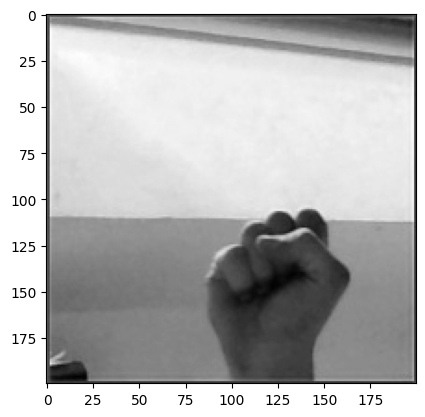

In [9]:
plt.figure()
plt.imshow(arr, cmap='gray')  # Assuming grayscale image, change cmap if needed
plt.show()

In [10]:
import cv2

In [11]:
image = cv2.imread(a)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale image
cv2.imshow('Original Image', image)
cv2.imshow('Grayscale Image', gray_image)

# Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
print(gray_image)

[[ 32  31  31 ...  31  28  31]
 [ 30  31  25 ...  26  34  26]
 [ 29  31 113 ...  82  81  30]
 ...
 [ 30  27  30 ... 116 125  26]
 [ 30  26  27 ... 121 118  29]
 [ 32  28  31 ...  27  30  29]]


In [13]:
img = cv2.imread(a)     
# Convert image to grayscale
# img = cv2.resize(img,(28,28))
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.asarray(gray_img)
norm_img = gray_img / 255.0
norm_img = norm_img.flatten()
# Flatten image to 1D array
flat_img = gray_img.flatten()
flat_img.size

print(flat_img)
print(norm_img)

[32 31 31 ... 27 30 29]
[0.1254902  0.12156863 0.12156863 ... 0.10588235 0.11764706 0.11372549]


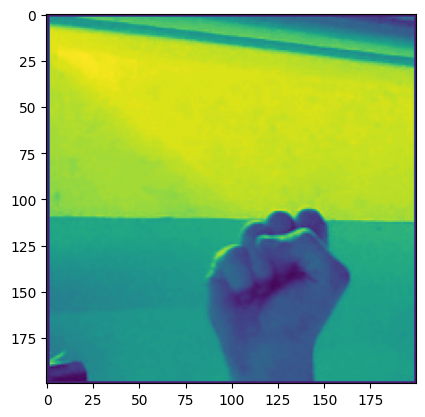

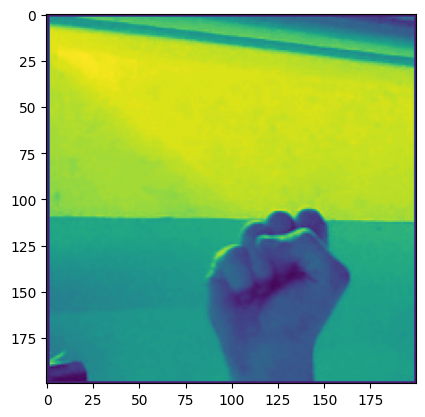

In [14]:
plt.figure()
plt.imshow(np.reshape(flat_img,(200,200)))
plt.figure()
plt.imshow(np.reshape(norm_img,(200,200)))

In [3]:
import cv2
import numpy as np
import os
import csv

# Set directory path containing images
directory_path = 'E:/ASL alpha/archive/asl_alphabet_train/N'

# Set CSV file path and name
csv_path = 'dataset.csv'

# Set image dimensions
img_rows, img_cols = 200, 200

# Initialize empty list for dataset
dataset = []
count = 0
# Iterate over images in directory
for filename in os.listdir(directory_path):
    if filename.endswith('.jpg') and count <10:
        count+=1
        # Read image
        img_path = os.path.join(directory_path, filename)
        img = cv2.imread(img_path)
        print(img_path)
        
        # Resize image to set dimensions
        img = cv2.resize(img, (28,28))
        
        # Convert image to grayscale
        gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
        
        # Normalize pixel values to range between 0 and 1
        norm_img = gray_img / 255.0
        
        # Flatten image to 1D array
        flat_img = norm_img.flatten()
        s =['N']
        s.extend(flat_img)
        # Append image array to dataset
        dataset.append(s)

# Save dataset to CSV file
with open(csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dataset)

E:/ASL alpha/archive/asl_alphabet_train/N\N1.jpg
E:/ASL alpha/archive/asl_alphabet_train/N\N10.jpg
E:/ASL alpha/archive/asl_alphabet_train/N\N100.jpg
E:/ASL alpha/archive/asl_alphabet_train/N\N1000.jpg
E:/ASL alpha/archive/asl_alphabet_train/N\N1001.jpg
E:/ASL alpha/archive/asl_alphabet_train/N\N1002.jpg
E:/ASL alpha/archive/asl_alphabet_train/N\N1003.jpg
E:/ASL alpha/archive/asl_alphabet_train/N\N1004.jpg
E:/ASL alpha/archive/asl_alphabet_train/N\N1005.jpg
E:/ASL alpha/archive/asl_alphabet_train/N\N1006.jpg


In [ ]:
DATA_DIR = 'E:/ASL alpha/archive/asl_alphabet_train'

for alphabet in os.listdir(DATA_DIR):
    for imgPath in os.listdir(os.path.join(DATA_DIR, alphabet)):
        img = cv2.imread(os.path.join(DATA_DIR, alphabet, imgPath))
        img = cv2.resize(img, (30,30))
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        norm_img = gray_img / 255.0
        flat_img = norm_img.flatten()
        s =[alphabet]
        s.extend(flat_img)
        # Append image array to dataset
        dataset.append(s)
        

with open(csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dataset)

In [1]:
import pandas

In [2]:
dataset= pandas.read_csv('dataset.csv')

In [3]:
len(dataset)

9

In [4]:
dataset.head()

,N,0.5248639215686274,0.4978803921568627,0.4784011764705882,0.5113474509803921,0.6187960784313725,0.6126572549019607,0.6200101960784313,0.6063674509803922,0.5982470588235294,...,0.15122588235294118,0.160518431372549,0.1357949019607843,0.14896627450980393,0.15525607843137254,0.15966666666666668,0.17121882352941178,0.1689592156862745,0.16770235294117647,0.15124980392156862
0,N,0.512442,0.490721,0.481428,0.513202,0.608652,0.615980,0.614766,0.610077,0.601274,...,0.107241,0.119754,0.133584,0.134031,0.137995,0.154193,0.157878,0.157558,0.161522,0.144133
1,N,0.499271,0.490975,0.477954,0.511752,0.627980,0.613594,0.610693,0.603340,0.595498,...,0.554480,0.552178,0.552136,0.543973,0.549235,0.540710,0.543459,0.534445,0.528222,0.520505
2,N,0.523970,0.491253,0.468704,0.516652,0.601704,0.597782,0.603002,0.594882,0.587040,...,0.426765,0.573977,0.565216,0.565174,0.562829,0.561657,0.559355,0.556286,0.550020,0.526620
3,N,0.337558,0.350705,0.330477,0.357267,0.381713,0.372360,0.467852,0.480915,0.728548,...,0.608215,0.625392,0.621900,0.622347,0.634111,0.620197,0.613333,0.621218,0.606536,0.590041
4,N,0.314944,0.344307,0.340875,0.327728,0.381181,0.383205,0.470685,0.495198,0.753018,...,0.609134,0.622347,0.637670,0.615079,0.621496,0.619151,0.617018,0.619151,0.601678,0.591256
